## Import libraries

In [88]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,SimpleRNN, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import load_model
from sklearn.preprocessing import LabelEncoder
import cv2
from google.colab.patches import cv2_imshow

In [2]:
def extractImages(datadir):
    # Get the data
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for images in os.listdir(path):
            img = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return (imagesData, imagesLabel)

## Loading the data

In [3]:
!wget https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
!unzip -qo data.zip

--2024-06-01 11:22:03--  https://cainvas-static.s3.amazonaws.com/media/user_data/Yuvnish17/data.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.156.107, 52.219.156.67, 16.12.40.11, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.156.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28437489 (27M) [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip            100%[===================>]  27.12M  8.35MB/s    in 3.2s    

2024-06-01 11:22:07 (8.35 MB/s) - ‘data.zip’ saved [28437489/28437489]



In [ ]:
def download_csv(datadir):
    imagesData = []
    imagesLabel = []
    for folder in os.listdir(datadir):
        path = os.path.join(datadir, folder)
        for image in os.listdir(path):
            img = cv2.imread(os.path.join(path, image), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (32, 32))
            img = img.flatten()
            imagesData.append(img)
            imagesLabel.append(folder)

    combined = list(zip(imagesData, imagesLabel))
    random.shuffle(combined)
    imagesData, imagesLabel = zip(*combined)

    return np.array(imagesData), np.array(imagesLabel)

data_dir = '/content/data/dataset'

imagesData, imagesLabel = download_csv(data_dir)

X = np.array(imagesData)
X = X / 255.0
Y = np.array(imagesLabel)
df_X = pd.DataFrame(X)
df_X['label'] = Y
df_X.to_csv('data.csv', index=False)

In [ ]:
img=cv2.imread('/content/data/dataset/div/%_1_1.png')
cv2_imshow(img)

In [ ]:
df=pd.read_csv('data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,div
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,sub
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4


In [4]:
imagesData = []
imagesLabel = []
data_dir = '/content/data/dataset'
imagesData, imagesLabel = extractImages(data_dir)
print("Number of images: ",len(imagesData))
print("Labels:",list(set(imagesLabel)))

Number of images:  7600
Labels: ['5', '4', '3', '6', '7', '1', '8', 'mul', 'div', 'add', '0', 'sub', '9', '2']


In [5]:
import os

def count_images_in_folder(folder_path):
    valid_image_extensions = {".jpg", ".png"}

    files = os.listdir(folder_path)

    image_count = sum(1 for file in files if os.path.splitext(file)[1].lower() in valid_image_extensions)

    return image_count


folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add','sub','mul','div']
image_count={}
for i in folders:
  folder_path = '/content/data/dataset/'+i
  x = count_images_in_folder(folder_path)
  image_count[i] = x
  print(f'Number of images in the folder "{folder_path}": {x}')


Number of images in the folder "/content/data/dataset/0": 595
Number of images in the folder "/content/data/dataset/1": 562
Number of images in the folder "/content/data/dataset/2": 433
Number of images in the folder "/content/data/dataset/3": 541
Number of images in the folder "/content/data/dataset/4": 526
Number of images in the folder "/content/data/dataset/5": 433
Number of images in the folder "/content/data/dataset/6": 581
Number of images in the folder "/content/data/dataset/7": 533
Number of images in the folder "/content/data/dataset/8": 554
Number of images in the folder "/content/data/dataset/9": 546
Number of images in the folder "/content/data/dataset/add": 596
Number of images in the folder "/content/data/dataset/sub": 655
Number of images in the folder "/content/data/dataset/mul": 577
Number of images in the folder "/content/data/dataset/div": 468


In [6]:
print(sum(list(image_count.values())))

7600


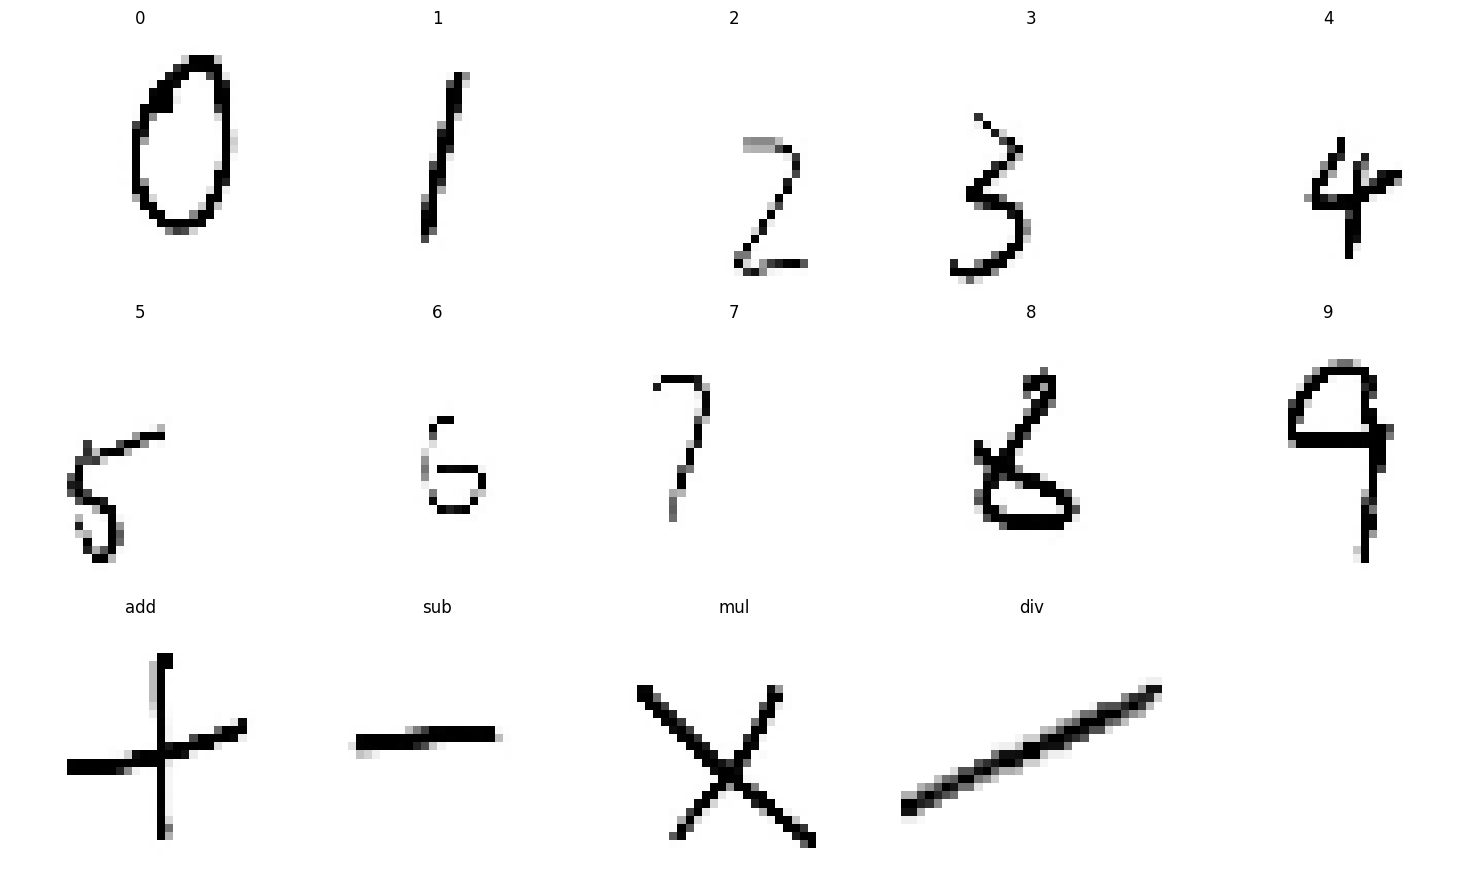

In [99]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = '/content/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)



fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"{folders[i]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

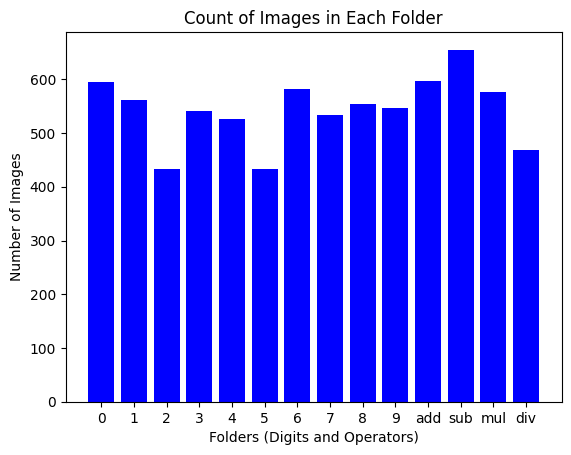

In [7]:
plt.bar(image_count.keys(), image_count.values(), color='blue')
plt.xlabel('Folders (Digits and Operators)')
plt.ylabel('Number of Images')
plt.title('Count of Images in Each Folder')
plt.show()

7600
8


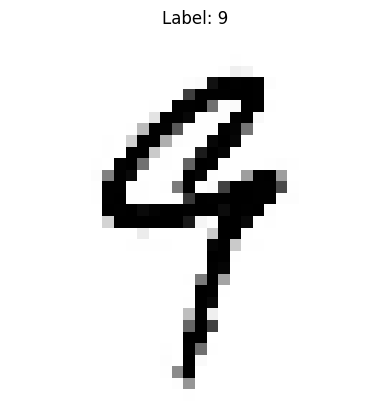

In [8]:
def display_image(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

print(len(imagesLabel))
x=int(input())
display_image(imagesData[x], imagesLabel[x])

In [9]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(imagesLabel)

In [19]:
label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
print(label_mapping)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'add', 11: 'div', 12: 'mul', 13: 'sub'}


In [10]:
X=np.array(imagesData)
Y=np.array(y)
X=X/255.0

In [11]:
X.shape

(7600, 32, 32)

In [12]:
X = np.expand_dims(X, axis=-1)
X.shape

(7600, 32, 32, 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')

Training set size: 6080
Testing set size: 1520


In [14]:
len(np.unique(y))

14

## CNN Model

In [17]:
cnn_model=Sequential()
cnn_model.add(Conv2D(64,(3,3),input_shape=(32,32,1),activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(14, activation='softmax'))

cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 64)         

In [18]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
cnn_history = cnn_model.fit(X_train, y_train,epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
190/190 [==============================] - 15s 76ms/step - loss: 2.0170 - acc: 0.3324 - val_loss: 0.9832 - val_acc: 0.7020
Epoch 2/30
190/190 [==============================] - 15s 76ms/step - loss: 0.8992 - acc: 0.7164 - val_loss: 0.5667 - val_acc: 0.8230
Epoch 3/30
190/190 [==============================] - 15s 77ms/step - loss: 0.6354 - acc: 0.7998 - val_loss: 0.3939 - val_acc: 0.8875
Epoch 4/30
190/190 [==============================] - 15s 77ms/step - loss: 0.5013 - acc: 0.8382 - val_loss: 0.2901 - val_acc: 0.9230
Epoch 5/30
190/190 [==============================] - 15s 78ms/step - loss: 0.4158 - acc: 0.8674 - val_loss: 0.2568 - val_acc: 0.9217
Epoch 6/30
190/190 [==============================] - 15s 77ms/step - loss: 0.3575 - acc: 0.8845 - val_loss: 0.2154 - val_acc: 0.9434
Epoch 7/30
190/190 [==============================] - 14s 76ms/step - loss: 0.3250 - acc: 0.8974 - val_loss: 0.1973 - val_acc: 0.9467
Epoch 8/30
190/190 [==============================] - 14s 76ms

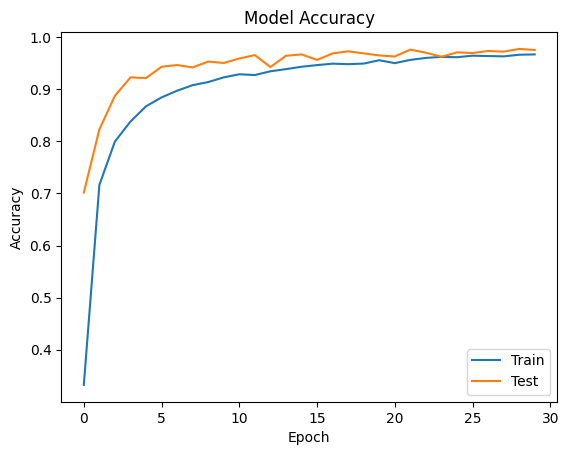

In [20]:
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [21]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy of the loaded model: {accuracy * 100:.2f}%')

48/48 [==============================] - 1s 18ms/step - loss: 0.0771 - acc: 0.9757
Test accuracy of the loaded model: 97.57%


In [22]:
loss, accuracy = cnn_model.evaluate(X,y)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

238/238 [==============================] - 4s 17ms/step - loss: 0.0265 - acc: 0.9926
Accuracy of the model: 99.26%


In [78]:
print(y.shape)

(7600,)


In [86]:
predictions = cnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)

238/238 [==============================] - 6s 25ms/step


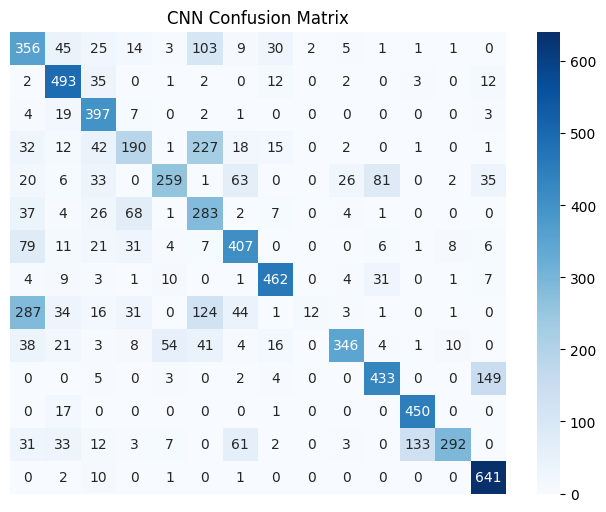

In [97]:
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.axis('off')
plt.title("CNN Confusion Matrix")
plt.show()


In [ ]:
cm = confusion_matrix(y, predictions_flat)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

In [23]:
cnn_model.save('cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
cnn_model = load_model('cnn_model.h5')

1/1 [==============================] - 0s 56ms/step


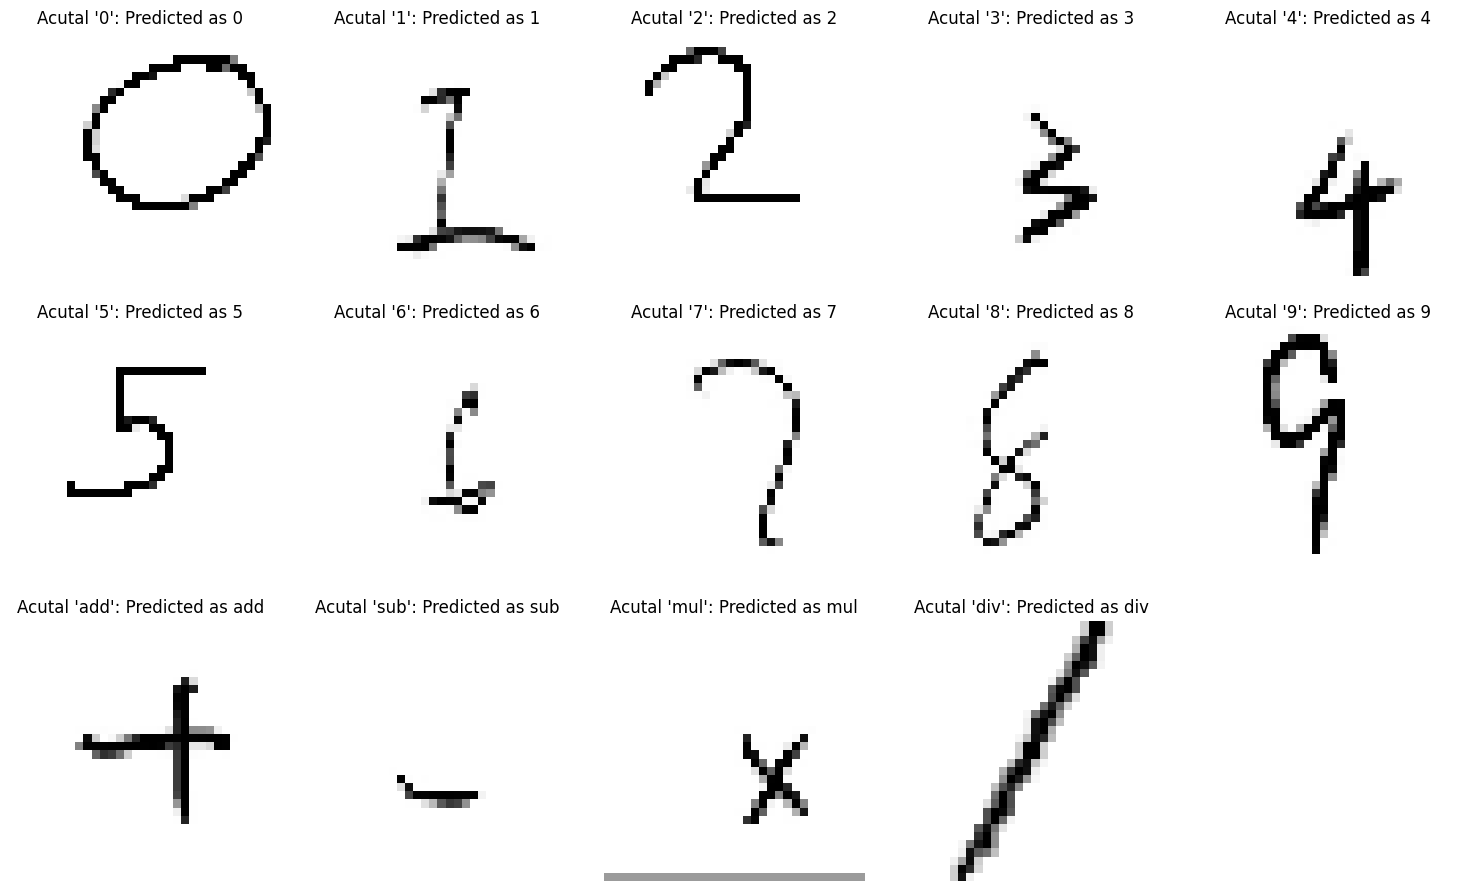

In [95]:
folders = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'add', 'sub', 'mul', 'div']
images = []

for folder in folders:
    folder_path = '/content/data/dataset/' + folder
    image_files = os.listdir(folder_path)
    if image_files:
        random_image_file = random.choice(image_files)
        image = cv2.imread(os.path.join(folder_path, random_image_file), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (32, 32))
        images.append(image)

images = np.array(images)
images = images / 255.0
images = np.expand_dims(images, axis=-1)

predictions = cnn_model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(images):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f"Acutal '{folders[i]}': Predicted as {label_mapping[predicted_labels[i]]}")
        ax.axis('off')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model  # type: ignore

labels = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: '+', 11: '/', 12: '*', 13: '-'}

model = load_model('cnn_model.h5')

def predict(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = [cv2.boundingRect(contour) for contour in contours]
    sorted_indices = sorted(range(len(bounding_boxes)), key=lambda i: bounding_boxes[i][0])
    sorted_contours = [contours[i] for i in sorted_indices]

    rois = []
    padding = 15

    for contour in sorted_contours:
        x, y, w, h = cv2.boundingRect(contour)
        x_start = max(0, x - padding)
        y_start = max(0, y - padding)
        x_end = min(image.shape[1], x + w + padding)
        y_end = min(image.shape[0], y + h + padding)

        roi = image[y_start:y_end, x_start:x_end]
        roi = cv2.resize(roi, (32, 32))
        rois.append(roi)

    rois = np.array(rois)
    rois = rois / 255.0
    rois = np.expand_dims(rois, axis=-1)

    predictions = model.predict(rois)
    predicted_labels = np.argmax(predictions, axis=1)

    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for i, contour in enumerate(sorted_contours):
        x, y, w, h = cv2.boundingRect(contour)
        label = labels[predicted_labels[i]]
        cv2.rectangle(image_color, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image_color, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    equation = ''.join(labels[predicted_labels[i]] for i in range(len(predicted_labels)))
    print(f'Predicted equation: {equation}')
    print(f'Result: {eval(equation)}')

1/1 [==============================] - 0s 30ms/step


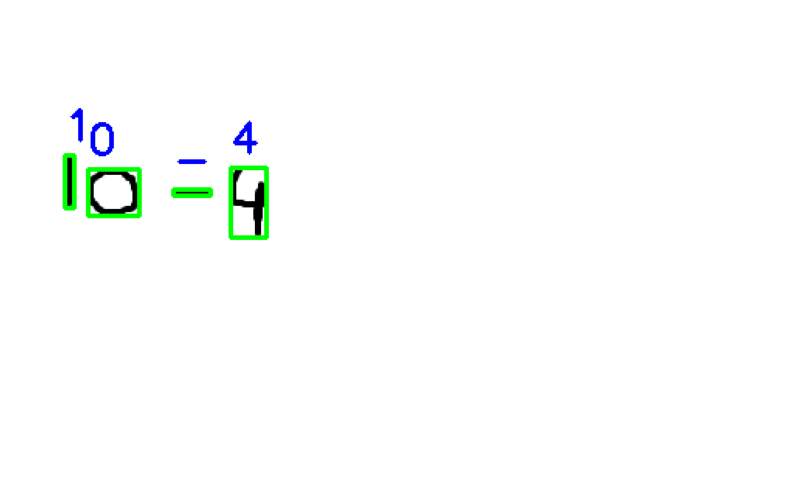

Predicted equation: 10-4
Result: 6


In [50]:
predict('test2.png')

## RNN model

In [71]:
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, input_shape=(32, 32), activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu', return_sequences=True))
rnn_model.add(SimpleRNN(64, activation='relu'))
rnn_model.add(Dropout(0.5))
rnn_model.add(Flatten())
rnn_model.add(Dense(128, activation='relu'))
rnn_model.add(Dense(14, activation='softmax'))

rnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_48 (SimpleRNN)   (None, 32, 64)            6208      
                                                                 
 simple_rnn_49 (SimpleRNN)   (None, 32, 64)            8256      
                                                                 
 simple_rnn_50 (SimpleRNN)   (None, 64)                8256      
                                                                 
 dropout_22 (Dropout)        (None, 64)                0         
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dense_13 (Dense)            (None, 14)              

In [72]:
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
rnn_history = rnn_model.fit(X_train, y_train,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
190/190 [==============================] - 10s 29ms/step - loss: 2.5937 - acc: 0.1104 - val_loss: 2.4177 - val_acc: 0.1632
Epoch 2/30
190/190 [==============================] - 6s 30ms/step - loss: 2.3089 - acc: 0.2044 - val_loss: 2.1401 - val_acc: 0.2809
Epoch 3/30
190/190 [==============================] - 5s 29ms/step - loss: 2.0693 - acc: 0.2757 - val_loss: 1.8304 - val_acc: 0.3651
Epoch 4/30
190/190 [==============================] - 5s 24ms/step - loss: 1.8540 - acc: 0.3433 - val_loss: 1.7100 - val_acc: 0.3875
Epoch 5/30
190/190 [==============================] - 6s 34ms/step - loss: 1.7172 - acc: 0.3964 - val_loss: 1.5053 - val_acc: 0.4408
Epoch 6/30
190/190 [==============================] - 5s 25ms/step - loss: 1.5748 - acc: 0.4400 - val_loss: 1.4741 - val_acc: 0.4572
Epoch 7/30
190/190 [==============================] - 5s 25ms/step - loss: 1.4843 - acc: 0.4798 - val_loss: 1.4243 - val_acc: 0.5072
Epoch 8/30
190/190 [==============================] - 7s 35ms/step -

In [93]:
rnn_model.save('rnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


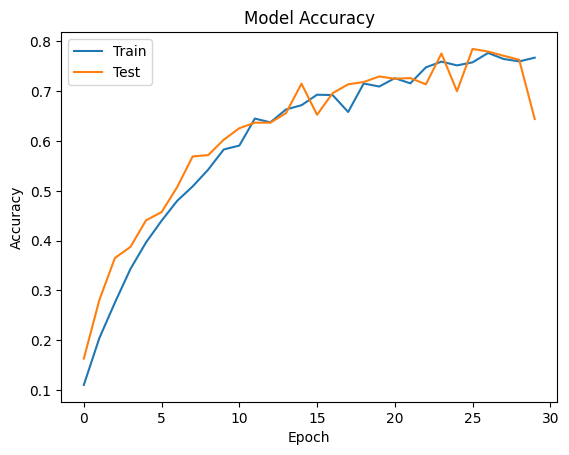

In [73]:
plt.plot(rnn_history.history['acc'])
plt.plot(rnn_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

238/238 [==============================] - 2s 9ms/step


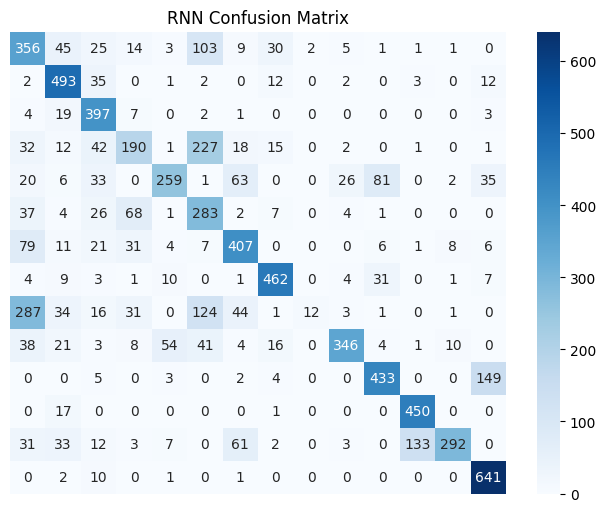

In [98]:
predictions = rnn_model.predict(X)
predictions_flat = np.argmax(predictions, axis=1)
cm = confusion_matrix(y, predictions_flat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("RNN Confusion Matrix")
plt.axis('off')
plt.show()

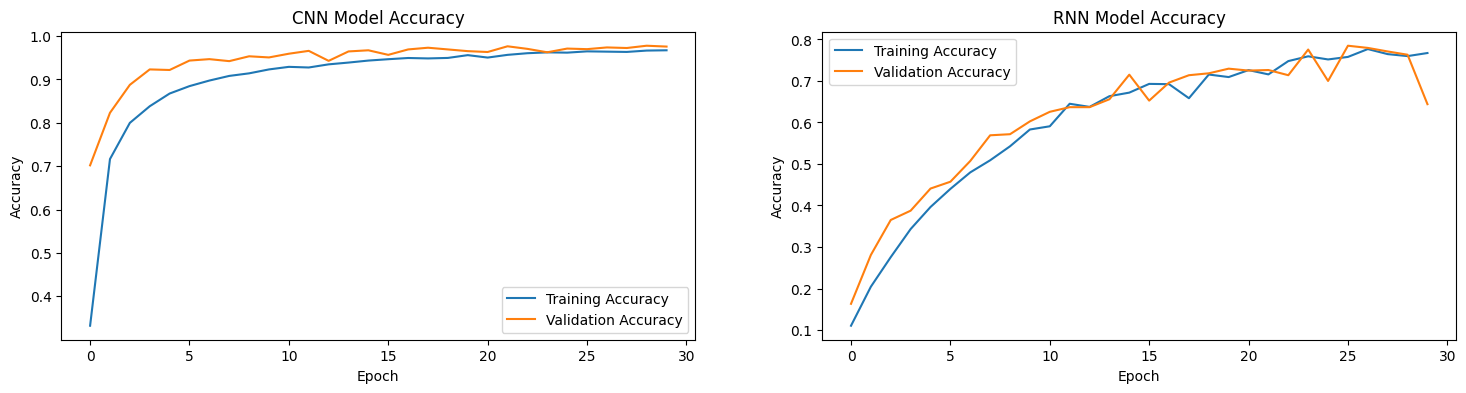

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(18, 4))

axes[0].plot(cnn_history.history['acc'], label='Training Accuracy')
axes[0].plot(cnn_history.history['val_acc'], label='Validation Accuracy')
axes[0].set_title('CNN Model Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='best')

axes[1].plot(rnn_history.history['acc'], label='Training Accuracy')
axes[1].plot(rnn_history.history['val_acc'], label='Validation Accuracy')
axes[1].set_title('RNN Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best')

plt.show()


## Conclusion

In conclusion, the handwritten equation solver utilizing deep learning techniques, including Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), has demonstrated promising accuracy levels. The CNN-based approach achieved an impressive accuracy of 97.57%, while the RNN-based method achieved a respectable accuracy of 76.32%.

The CNN model excelled in accurately recognizing and classifying individual handwritten characters within the equations. Its ability to effectively capture spatial hierarchies and local patterns in the input images contributed to its high accuracy. With its deep layers and convolutional operations, the CNN was capable of learning complex features directly from the pixel values, enabling robust classification of handwritten characters.